# Rede Neural para Acidentes em uma Usina Nuclear

## Bibliotecas

In [248]:
# Análise e visualização de dados
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Construção da rede neural
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split 
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping

## 1. Carrega dados

In [249]:
dados_ruido_1 = pd.read_csv("../data/1_noisy_16_operational_scenarios.csv")
dados_ruido_2 = pd.read_csv("../data/2_noisy_16_operational_scenarios_1.csv")
dados_sem_ruido = pd.read_csv("../data/16_operational_scenarios_1.csv")

## 2. Visualização dos dados

In [250]:
dados_ruido_1.head(3)

,Tempo (s),Vazao no nucleo (%),Temperatura na perna quente (C),Temperatura na perna fria (C),Vazao no nucleo (kg/s),Nivel no gerador de vapor - Faixa larga (%),Nivel no gerador de vapor - Faixa estreita (%),Pressao no gerador de vapor (Mpa),Vazao de agua de alimentacao (kg/s),Vazao de vapor (kg/s),Vazao no circuito primario (kg/s),Pressao no sistema primario (Mpa),Potencia Termica (%),Potencia Nuclear (%),Margem de sub-resfriamento (C),Nivel do pressurizador (%),Temperatura media no primario (C),acidente
0,0,104.243711,324.852712,290.119941,50419.127636,50.147174,61.807681,8.582747,527.506480,528.551475,106.741831,15.930347,99.449420,99.154224,22.241006,58.465101,309.573320,blackout
1,1,106.384864,324.517194,291.030773,50418.619925,49.448373,62.221050,5.569829,528.348726,529.647645,104.707226,16.214595,99.687547,98.932161,21.401202,59.994478,307.039656,blackout
2,2,100.182499,324.768348,291.263438,50044.930572,49.084206,63.439953,5.786461,34.283616,353.915246,98.959945,13.733822,12.993004,11.140458,30.932739,54.878668,302.811650,blackout


In [251]:
dados_ruido_2.head(3)

,Tempo (s),Vazao no nucleo (%),Temperatura na perna quente (C),Temperatura na perna fria (C),Vazao no nucleo (kg/s),Nivel no gerador de vapor - Faixa larga (%),Nivel no gerador de vapor - Faixa estreita (%),Pressao no gerador de vapor (Mpa),Vazao de agua de alimentacao (kg/s),Vazao de vapor (kg/s),Vazao no circuito primario (kg/s),Pressao no sistema primario (Mpa),Potencia Termica (%),Potencia Nuclear (%),Margem de sub-resfriamento (C),Nivel do pressurizador (%),Temperatura media no primario (C),acidente
0,0,104.939658,323.524411,292.620726,50418.749479,49.233819,64.511352,7.075125,529.016851,527.605003,104.745694,15.711278,99.049419,100.867720,21.846421,60.609115,306.384661,blackout
1,1,105.670336,324.146896,290.494394,50419.063168,49.778172,63.319682,6.867931,528.687407,528.804908,106.442260,15.301440,96.890470,99.697501,21.101135,59.236471,309.215408,blackout
2,2,97.880888,324.610306,294.821211,50044.700027,49.583589,61.813460,6.795786,35.346247,353.252309,100.702658,16.034009,11.926949,12.984007,29.895678,55.451286,303.596089,blackout


In [252]:
dados_sem_ruido.head(3)

,Tempo (s),Vazao no nucleo (%),Temperatura na perna quente (C),Temperatura na perna fria (C),Vazao no nucleo (kg/s),Nivel no gerador de vapor - Faixa larga (%),Nivel no gerador de vapor - Faixa estreita (%),Pressao no gerador de vapor (Mpa),Vazao de agua de alimentacao (kg/s),Vazao de vapor (kg/s),Vazao no circuito primario (kg/s),Pressao no sistema primario (Mpa),Potencia Termica (%),Potencia Nuclear (%),Margem de sub-resfriamento (C),Nivel do pressurizador (%),Temperatura media no primario (C),acidente
0,0,105.2230,324.465,291.456,50418.4,50.0000,62.5153,6.89480,527.7670,527.767,105.2230,15.8000,100.0000,100.0000,21.8620,59.1491,307.959,blackout
1,1,105.3900,324.463,291.457,50418.3,50.0078,62.5169,6.89413,527.8900,528.396,105.3900,15.7999,100.0050,100.0050,21.8967,59.1357,307.942,blackout
2,2,99.4508,325.009,291.500,50044.8,49.0423,62.2777,6.94732,34.5845,354.461,99.4663,15.4866,11.9731,11.9757,30.3013,54.6116,303.144,blackout


## 3. Análise Exploratória 

In [253]:
# Concatena todos os dados
df_final = pd.concat([dados_ruido_1, dados_ruido_2, dados_sem_ruido])

In [254]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2928 entries, 0 to 975
Data columns (total 18 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Tempo (s)                                       2928 non-null   int64  
 1   Vazao no nucleo (%)                             2928 non-null   float64
 2   Temperatura na perna quente (C)                 2928 non-null   float64
 3   Temperatura na perna fria (C)                   2928 non-null   float64
 4   Vazao no nucleo (kg/s)                          2928 non-null   float64
 5   Nivel no gerador de vapor - Faixa larga (%)     2928 non-null   float64
 6   Nivel no gerador de vapor - Faixa estreita (%)  2928 non-null   float64
 7   Pressao no gerador de vapor (Mpa)               2928 non-null   float64
 8   Vazao de agua de alimentacao (kg/s)             2928 non-null   float64
 9   Vazao de vapor (kg/s)                     

In [255]:
# Quantos tipos diferentes de acidentes
df_final['acidente'].unique().shape

(16,)

## 4. Tratamento dos dados

In [256]:
# Separa as entradas e as saídas da rede 
x_train = df_final.iloc[:, 1:17]
y_train = df_final['acidente']

In [257]:
# Divide o conjunto de dados
x_train, x_test, y_train, y_test = train_test_split(x_train, y_train, 
                                                    test_size = 0.05)

In [258]:
# Instância para normalizar os dados
normalizer = MinMaxScaler(feature_range = (0, 1))

# Normaliza as entradas de treinamento e teste
x_train = normalizer.fit_transform(x_train)
x_test = normalizer.fit_transform(x_test)

In [259]:
# Instância para transformar os dados em binário
lb = LabelBinarizer()

# Binariza as saídas de treinamento e teste
y_train = lb.fit_transform(y_train)
y_test = lb.fit_transform(y_test)

## 5. Modelagem e treinamento da rede

In [290]:
# Cria modelo sequencial
model = Sequential()

In [291]:
# Cria camada de entrada e primeira camada escondida
model.add(Dense(50, 
                input_shape = (16,), 
                activation = 'relu'))

# Cria camada de saída
model.add(Dense(16, 
                activation = 'softmax'))

In [292]:
# Visualização da rede
model.summary()

Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_55 (Dense)             (None, 50)                850       
_________________________________________________________________
dense_56 (Dense)             (None, 16)                816       
Total params: 1,666
Trainable params: 1,666
Non-trainable params: 0
_________________________________________________________________


In [293]:
# Compila a rede
model.compile(optimizer = 'adam', 
              loss = 'categorical_crossentropy', 
              metrics = ['accuracy'])

In [294]:
# Adiciona callbacks
early_stopping = EarlyStopping(monitor = 'val_loss', 
                               patience = 1)

In [295]:
# Treinamento da rede
history = model.fit(x_train, y_train, 
                    epochs = 100, 
                    shuffle = True, 
                    verbose = 1, 
                    batch_size = 2, 
                    validation_split = 0.05, 
                    callbacks = [early_stopping])

Epoch 1/100
1321/1321 [==============================] - 1s 827us/step - loss: 2.0105 - accuracy: 0.3249 - val_loss: 1.6971 - val_accuracy: 0.3929
Epoch 2/100
1321/1321 [==============================] - 1s 768us/step - loss: 1.4563 - accuracy: 0.4733 - val_loss: 1.4208 - val_accuracy: 0.5214
Epoch 3/100
1321/1321 [==============================] - 1s 787us/step - loss: 1.2919 - accuracy: 0.5271 - val_loss: 1.2927 - val_accuracy: 0.5357
Epoch 4/100
1321/1321 [==============================] - 1s 776us/step - loss: 1.1878 - accuracy: 0.5786 - val_loss: 1.2183 - val_accuracy: 0.6429
Epoch 5/100
1321/1321 [==============================] - 1s 784us/step - loss: 1.1145 - accuracy: 0.6051 - val_loss: 1.1287 - val_accuracy: 0.6286
Epoch 6/100
1321/1321 [==============================] - 1s 777us/step - loss: 1.0544 - accuracy: 0.6369 - val_loss: 1.0892 - val_accuracy: 0.6000
Epoch 7/100
1321/1321 [==============================] - 1s 785us/step - loss: 1.0096 - accuracy: 0.6456 - val_loss: 1

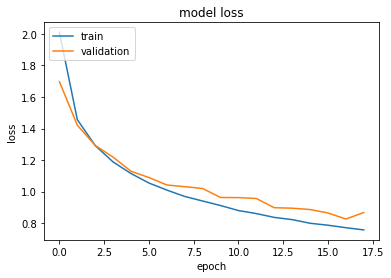

In [296]:
# Plota os erros de treinamento e de validação
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

## 6. Teste da rede em um novo conjunto de dados

In [297]:
model.evaluate(x_test, y_test)

5/5 [==============================] - 0s 1ms/step - loss: 0.9034 - accuracy: 0.7143


[0.9034408330917358, 0.7142857313156128]

## Acurácia = 0.714285 